In [1]:
# keep this function handy for all network visualizations in all chapters

# keep this function handy for all network visualizations in all chapters

import networkx as nx
import numpy as np
from IPython.display import SVG
from sknetwork.visualization import svg_graph
from sknetwork.data import Bunch
import pandas as pd
from tqdm import tqdm
from newspaper import Article
import time
import spacy
import scipy.sparse as sp


def draw_graph(G, show_names=False, node_size=0.2, font_size=10, edge_width=0.2, scale=1.0, node_color="lightblue", edge_color="black"):
    if not isinstance(G, nx.Graph):
        raise ValueError("Input graph must be a NetworkX Graph object.")

    adjacency = nx.to_numpy_array(G, nodelist=None, dtype=None, order=None, multigraph_weight=sum, weight='weight', nonedge=0.0)
    adjacency = sp.csr_matrix(adjacency)
    #adjacency = nx.to_numpy_array(G, weight='weight', multigraph_weight=sum)
    names = np.array(list(G.nodes()))
    print(names)
    graph = Bunch()
    graph.adjacency = adjacency
    graph.names = names

    if show_names and 'names' not in graph:
        raise ValueError("Graph must have node names if show_names is True.")

    image = svg_graph(
        graph.adjacency,  # Remove unused pagerank scores
        edge_width=edge_width,
        display_node_weight=True,
        node_size=node_size,
        font_size=font_size,
        names=graph.names if show_names else None,
        width=1024,
        height=1024,
        margin=0,
        scale=1.0,
        node_color="lightblue",
        edge_color="black",
        filename=None,
        directed=False

    )

    return SVG(image)

# constructing a graph

In [2]:
import networkx as nx 
import pandas as pd 
 
G = nx.les_miserables_graph() 
df = nx.to_pandas_edgelist(G)[['source', 'target']] # dropping 'weight'
G = nx.from_pandas_edgelist(df) 

G_named = G.copy()
G = nx.convert_node_labels_to_integers(G, first_label=0, ordering='default', label_attribute=None)
nodes = G_named.nodes

In [3]:
train_data = 'clf_df.csv'

clf_df = pd.read_csv(train_data).set_index('index')
clf_df.head()

,degrees,clustering,triangles,betw_cent,close_cent,pagerank,label
index,,,,,,,
Napoleon,1,0.000000,0,0.000000,0.301587,0.005584,0
Myriel,10,0.066667,3,0.176842,0.429379,0.042803,0
MlleBaptistine,3,1.000000,3,0.000000,0.413043,0.010279,0
MmeMagloire,3,1.000000,3,0.000000,0.413043,0.010279,0
CountessDeLo,1,0.000000,0,0.000000,0.301587,0.005584,0


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76]


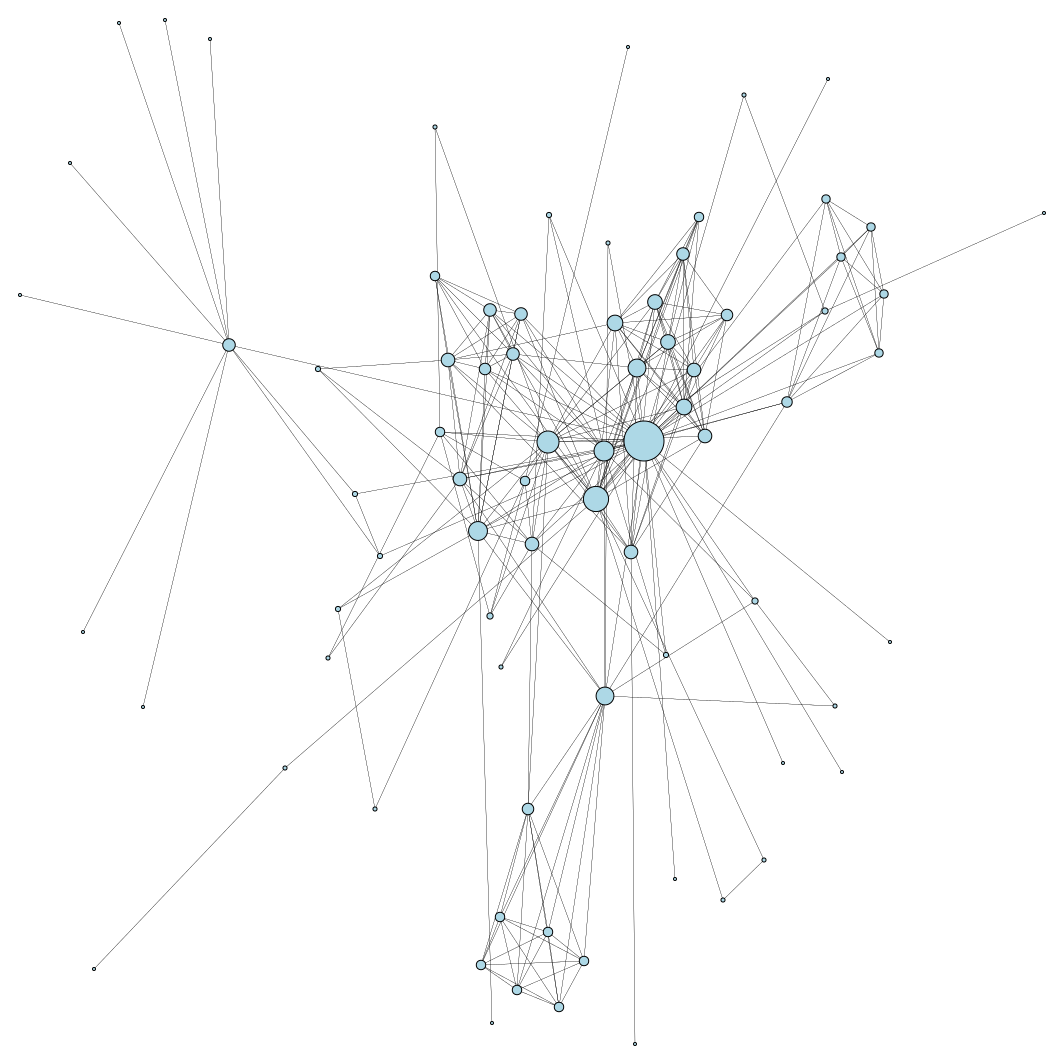

In [4]:
draw_graph(G, node_size=4, edge_width=0.2) 

# community detection in action

## scalable community detection (SCD)

In [5]:
%pip install karateclub

Note: you may need to restart the kernel to use updated packages.


In [6]:
from karateclub.community_detection.non_overlapping.scd import SCD 

import numpy as np 

c:\Users\amird\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
model = SCD()  

model.fit(G) 

clusters = model.get_memberships() 
clusters

{0: 34,
 1: 14,
 2: 14,
 3: 14,
 4: 33,
 5: 32,
 6: 31,
 7: 30,
 8: 29,
 9: 28,
 10: 11,
 11: 27,
 12: 13,
 13: 26,
 14: 25,
 15: 24,
 16: 7,
 17: 15,
 18: 15,
 19: 4,
 20: 15,
 21: 9,
 22: 11,
 23: 6,
 24: 23,
 25: 35,
 26: 11,
 27: 11,
 28: 11,
 29: 11,
 30: 11,
 31: 36,
 32: 9,
 33: 1,
 34: 4,
 35: 4,
 36: 1,
 37: 1,
 38: 1,
 39: 15,
 40: 15,
 41: 15,
 42: 15,
 43: 37,
 44: 7,
 45: 7,
 46: 7,
 47: 7,
 48: 7,
 49: 7,
 50: 7,
 51: 6,
 52: 15,
 53: 15,
 54: 22,
 55: 17,
 56: 21,
 57: 15,
 58: 4,
 59: 20,
 60: 17,
 61: 1,
 62: 1,
 63: 19,
 64: 19,
 65: 1,
 66: 1,
 67: 1,
 68: 1,
 69: 1,
 70: 1,
 71: 2,
 72: 2,
 73: 1,
 74: 0,
 75: 18,
 76: 16}

In [8]:
clusters = np.array(list(clusters.values())) 
clusters

array([34, 14, 14, 14, 33, 32, 31, 30, 29, 28, 11, 27, 13, 26, 25, 24,  7,
       15, 15,  4, 15,  9, 11,  6, 23, 35, 11, 11, 11, 11, 11, 36,  9,  1,
        4,  4,  1,  1,  1, 15, 15, 15, 15, 37,  7,  7,  7,  7,  7,  7,  7,
        6, 15, 15, 22, 17, 21, 15,  4, 20, 17,  1,  1, 19, 19,  1,  1,  1,
        1,  1,  1,  2,  2,  1,  0, 18, 16])

In [9]:
cluster_df = pd.DataFrame({'node':nodes, 'cluster':clusters}) 

cluster_df.head(10) 

,node,cluster
0,Napoleon,34
1,Myriel,14
2,MlleBaptistine,14
3,MmeMagloire,14
4,CountessDeLo,33
5,Geborand,32
6,Champtercier,31
7,Cravatte,30
8,Count,29
9,OldMan,28


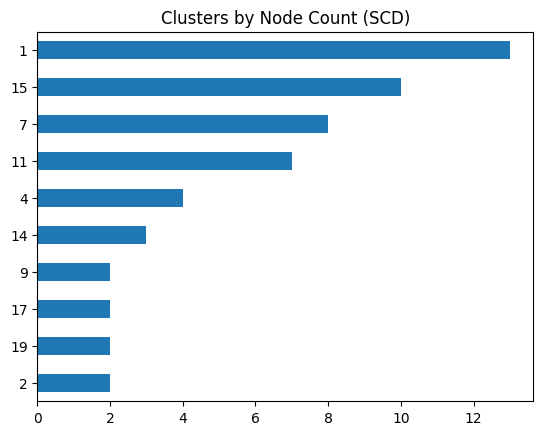

In [10]:
title = 'Clusters by Node Count (SCD)' 

cluster_df['cluster'].value_counts()[0:10].plot.barh(title=title).invert_yaxis() 

['Marius' 'Gavroche' 'Bahorel' 'Joly' 'Prouvaire' 'MmeHucheloup' 'Bossuet'
 'Combeferre' 'Mabeuf' 'Grantaire' 'Enjolras' 'Courfeyrac' 'Feuilly']


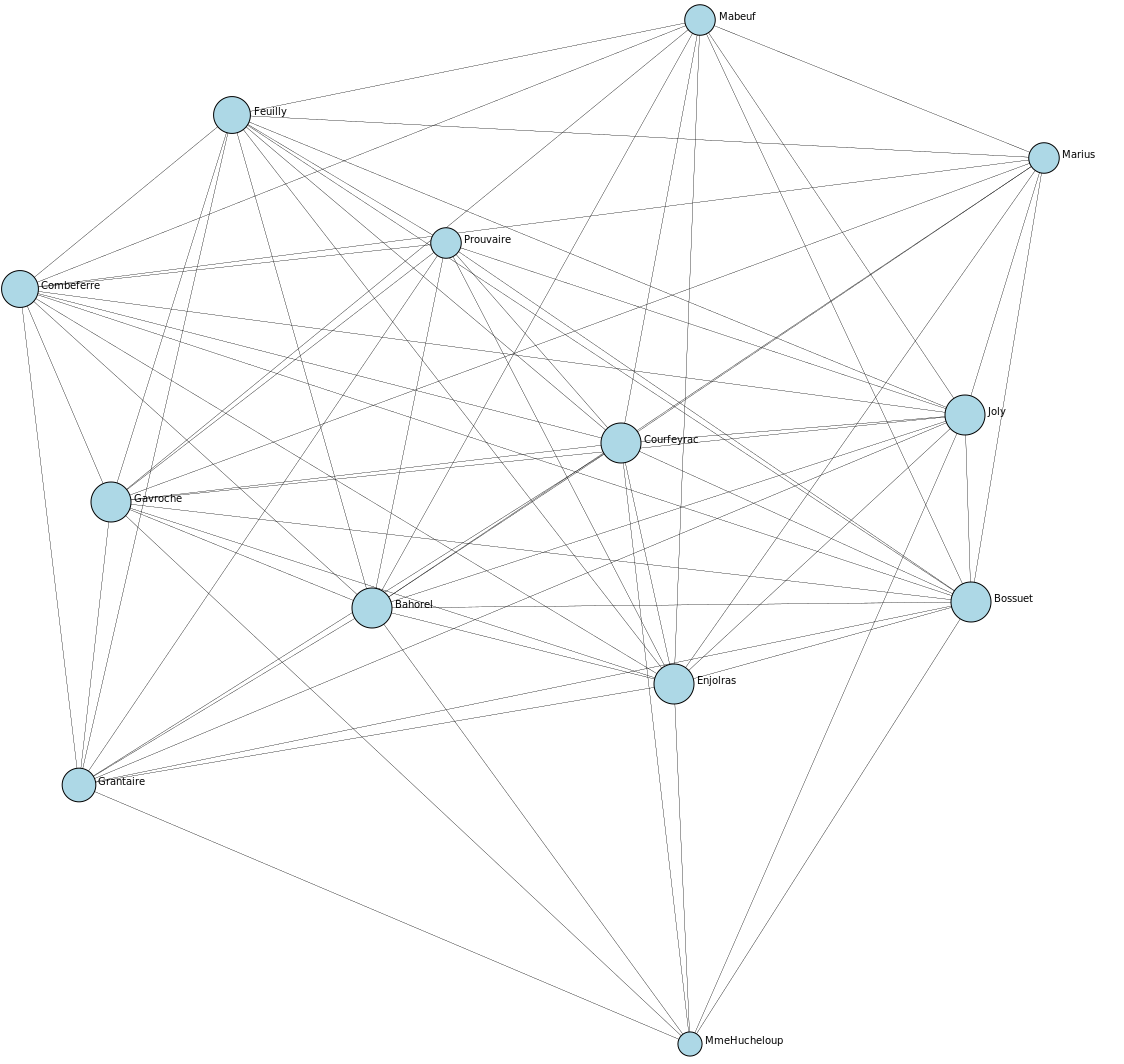

In [11]:
check_cluster = 1 

community_nodes = cluster_df[cluster_df['cluster']==check_cluster]['node'].to_list() 

G_comm = G_named.subgraph(community_nodes) 

draw_graph(G_comm, show_names=True, node_size=5) 

['Montparnasse' 'Claquesous' 'Brujon' 'Javert' 'Eponine' 'Gueulemer'
 'Babet' 'Thenardier' 'MmeThenardier' 'Anzelma']


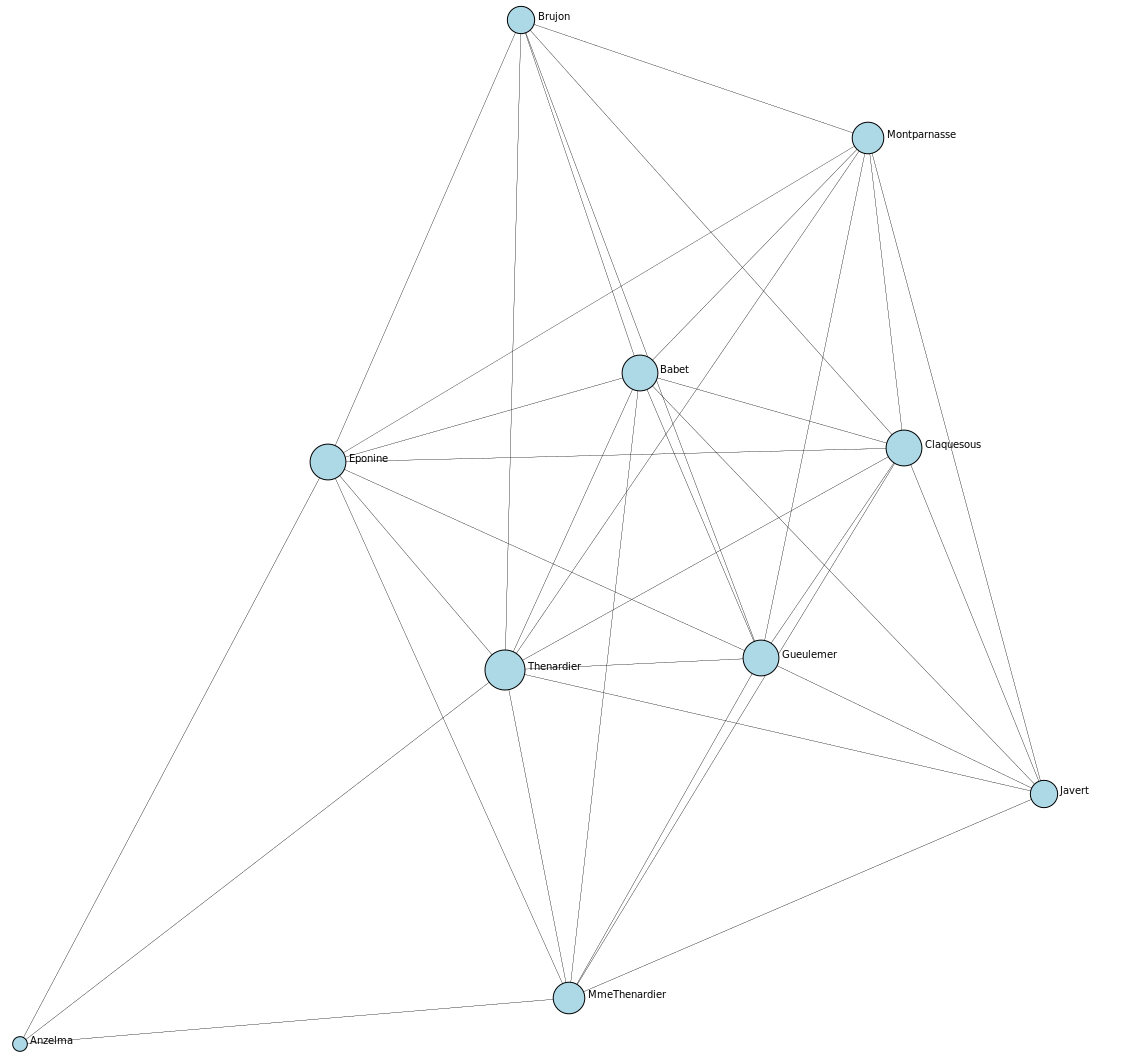

In [12]:
check_cluster = 15 

community_nodes = cluster_df[cluster_df['cluster']==check_cluster]['node'].to_list() 

G_comm = G_named.subgraph(community_nodes) 

draw_graph(G_comm, show_names=True, node_size=5) 

['Blacheville' 'Fameuil' 'Dahlia' 'Zephine' 'Tholomyes' 'Listolier'
 'Fantine' 'Favourite']


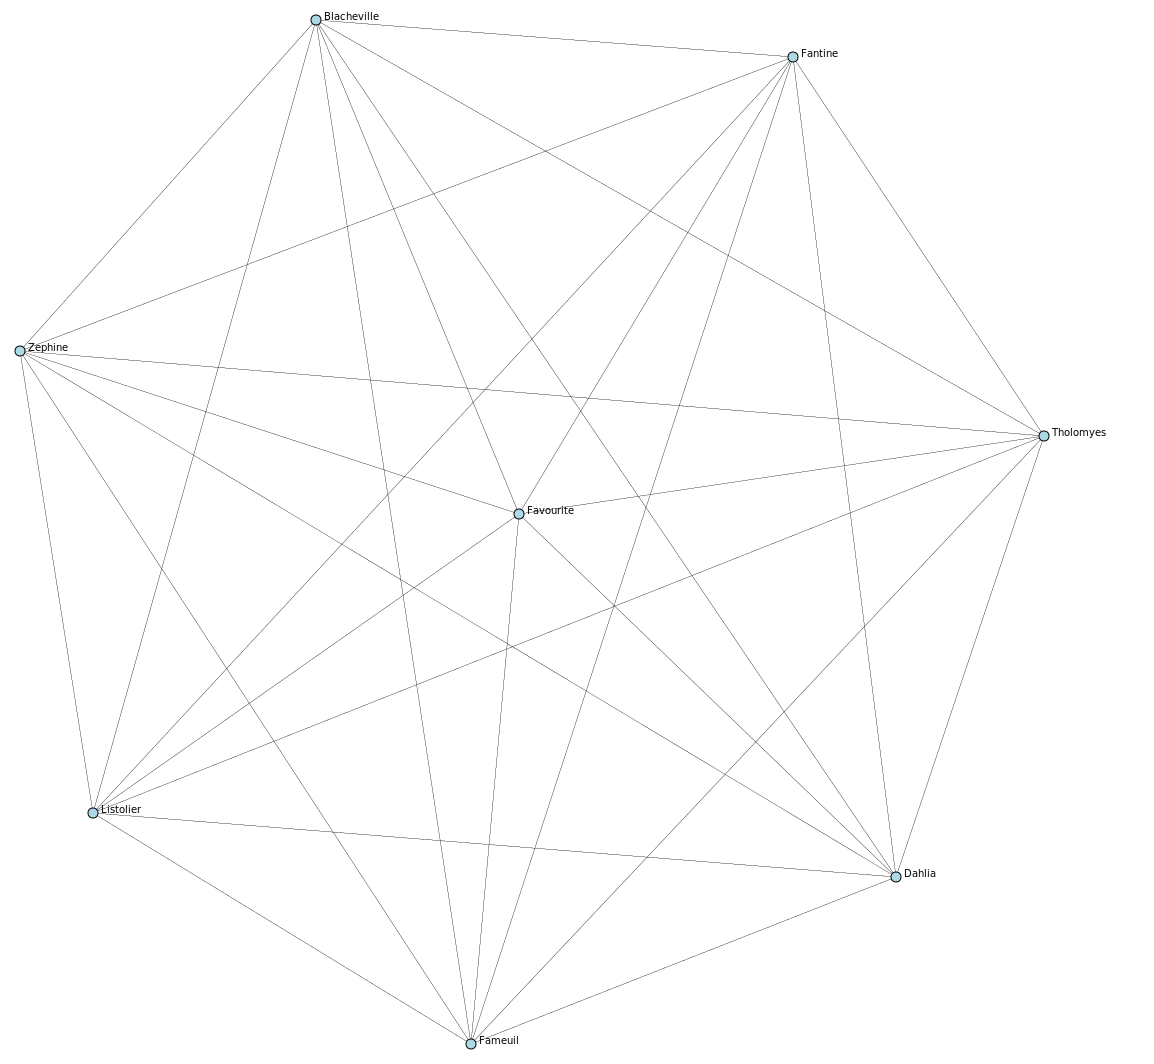

In [13]:
check_cluster = 7 

community_nodes = cluster_df[cluster_df['cluster']==check_cluster]['node'].to_list() 

G_comm = G_named.subgraph(community_nodes) 

draw_graph(G_comm, show_names=True, node_size=5) 

## EgoNetSplitter

In [14]:
from karateclub.community_detection.overlapping.ego_splitter import EgoNetSplitter 

model = EgoNetSplitter()  

model.fit(G) 

clusters = model.get_memberships() 
clusters = np.array(list(clusters.values())) 
clusters = [i[0] for i in clusters] # needed because put clusters into an array of arrays 

In [15]:
cluster_df = pd.DataFrame({'node':nodes, 'cluster':clusters}) 

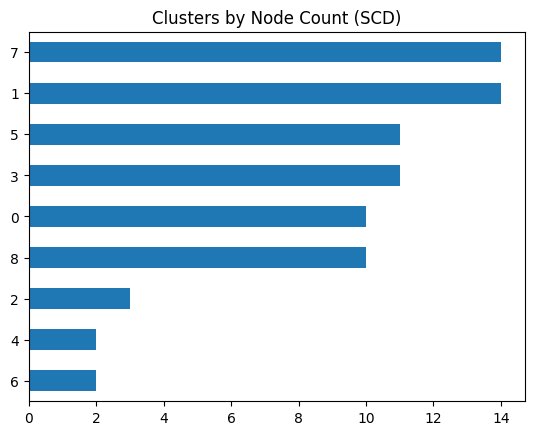

In [16]:
cluster_df['cluster'].value_counts()[0:10].plot.barh(title=title).invert_yaxis() 

['Labarre' 'Marguerite' 'Chenildieu' 'Valjean' 'Judge' 'MmeDeR' 'Gervais'
 'Brevet' 'Bamatabois' 'Cochepaille' 'Champmathieu' 'Scaufflaire' 'Woman1'
 'Isabeau']


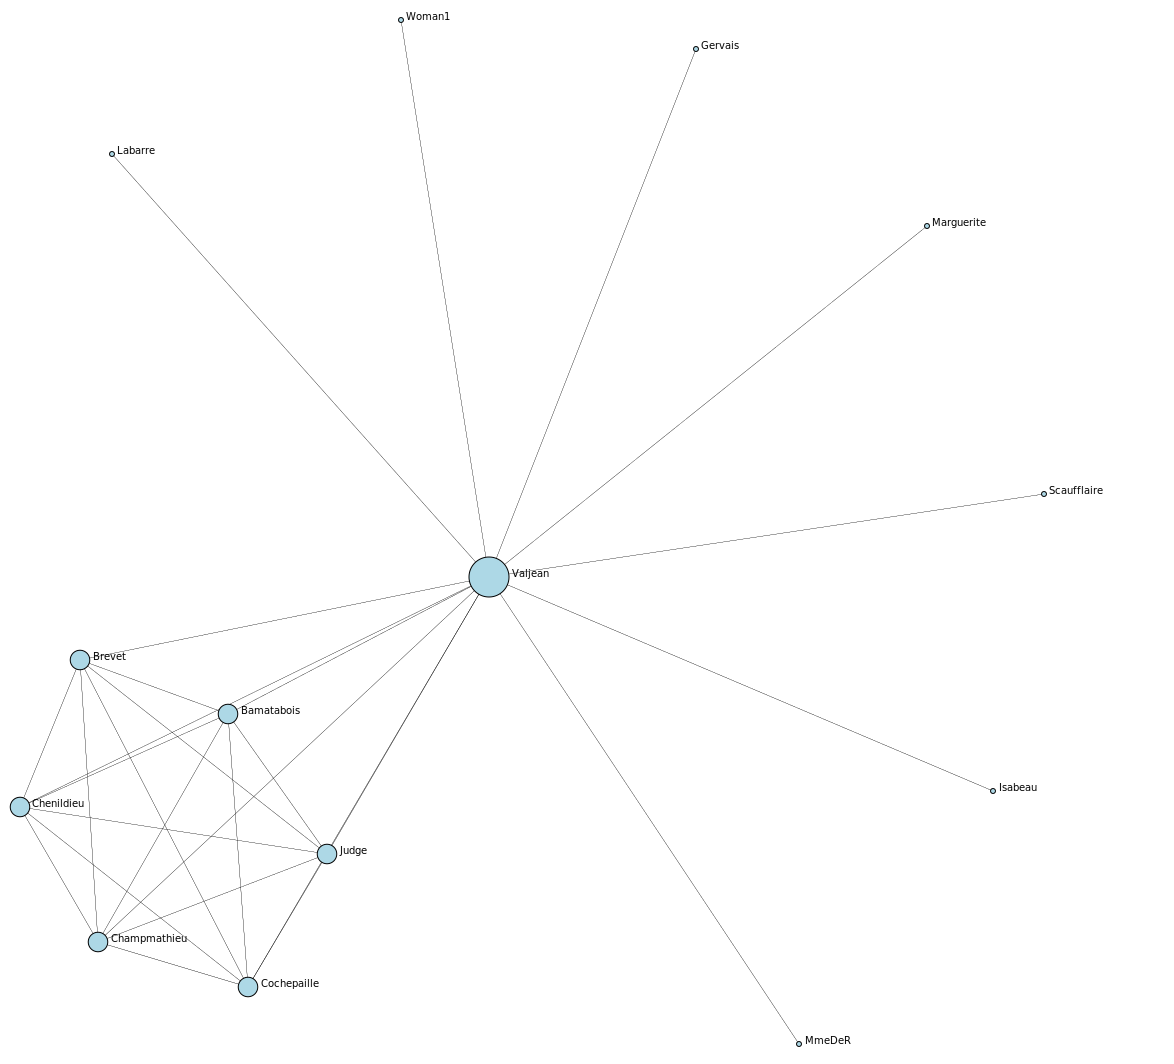

In [17]:
check_cluster = 7 

community_nodes = cluster_df[cluster_df['cluster']==check_cluster]['node'].to_list() 

G_comm = G_named.subgraph(community_nodes) 

draw_graph(G_comm, show_names=True, node_size=5) 

['Marius' 'Gavroche' 'MotherPlutarch' 'Bahorel' 'Joly' 'Prouvaire'
 'MmeHucheloup' 'Bossuet' 'Combeferre' 'Mabeuf' 'Grantaire' 'Enjolras'
 'Courfeyrac' 'Feuilly']


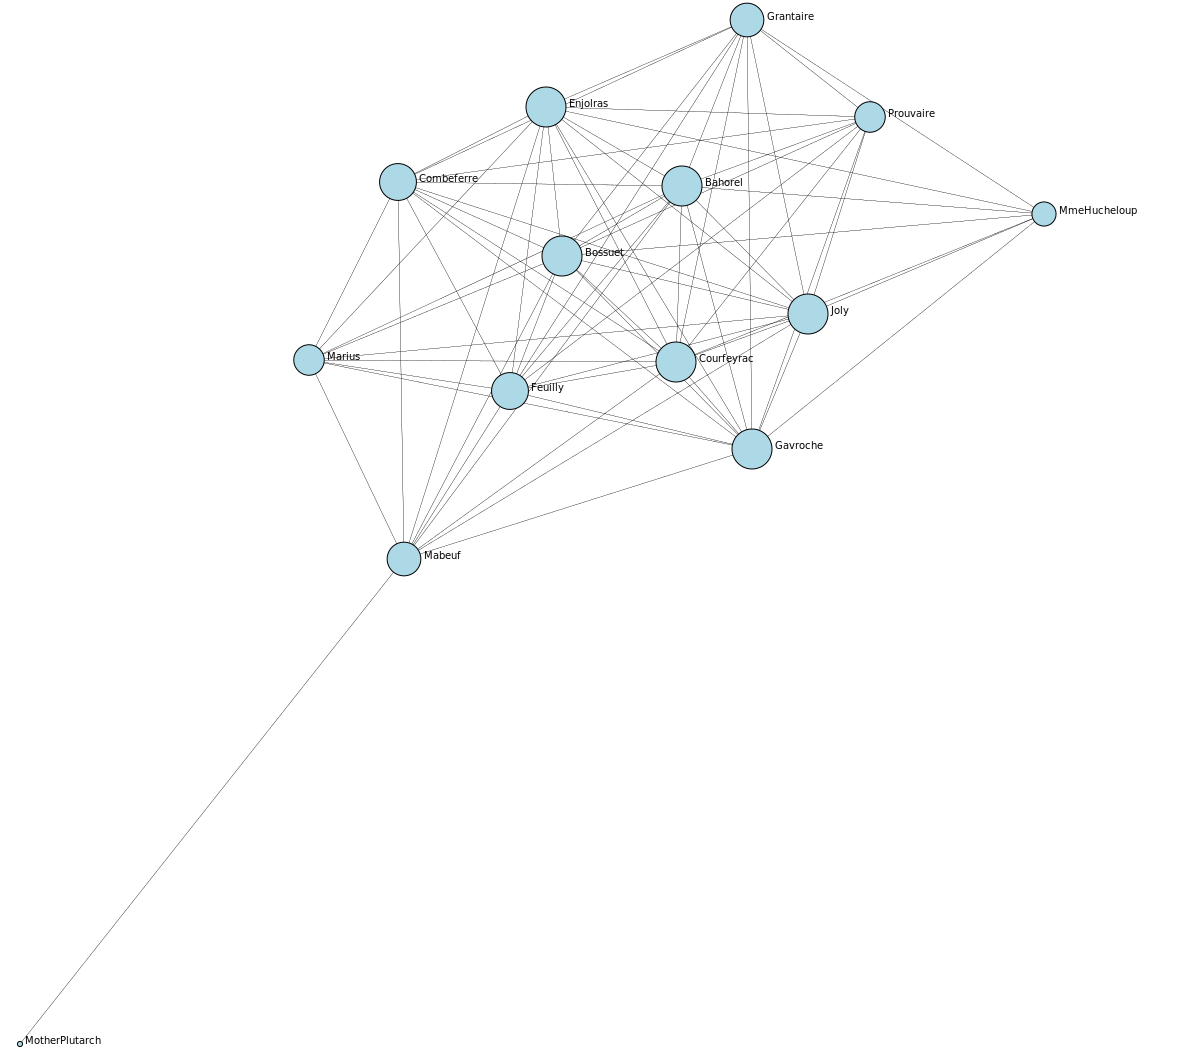

In [18]:
check_cluster = 1 

community_nodes = cluster_df[cluster_df['cluster']==check_cluster]['node'].to_list() 

G_comm = G_named.subgraph(community_nodes) 

draw_graph(G_comm, show_names=True, node_size=5) 

['Montparnasse' 'Claquesous' 'Brujon' 'Javert' 'Eponine' 'Boulatruelle'
 'Gueulemer' 'Babet' 'Thenardier' 'MmeThenardier' 'Anzelma']


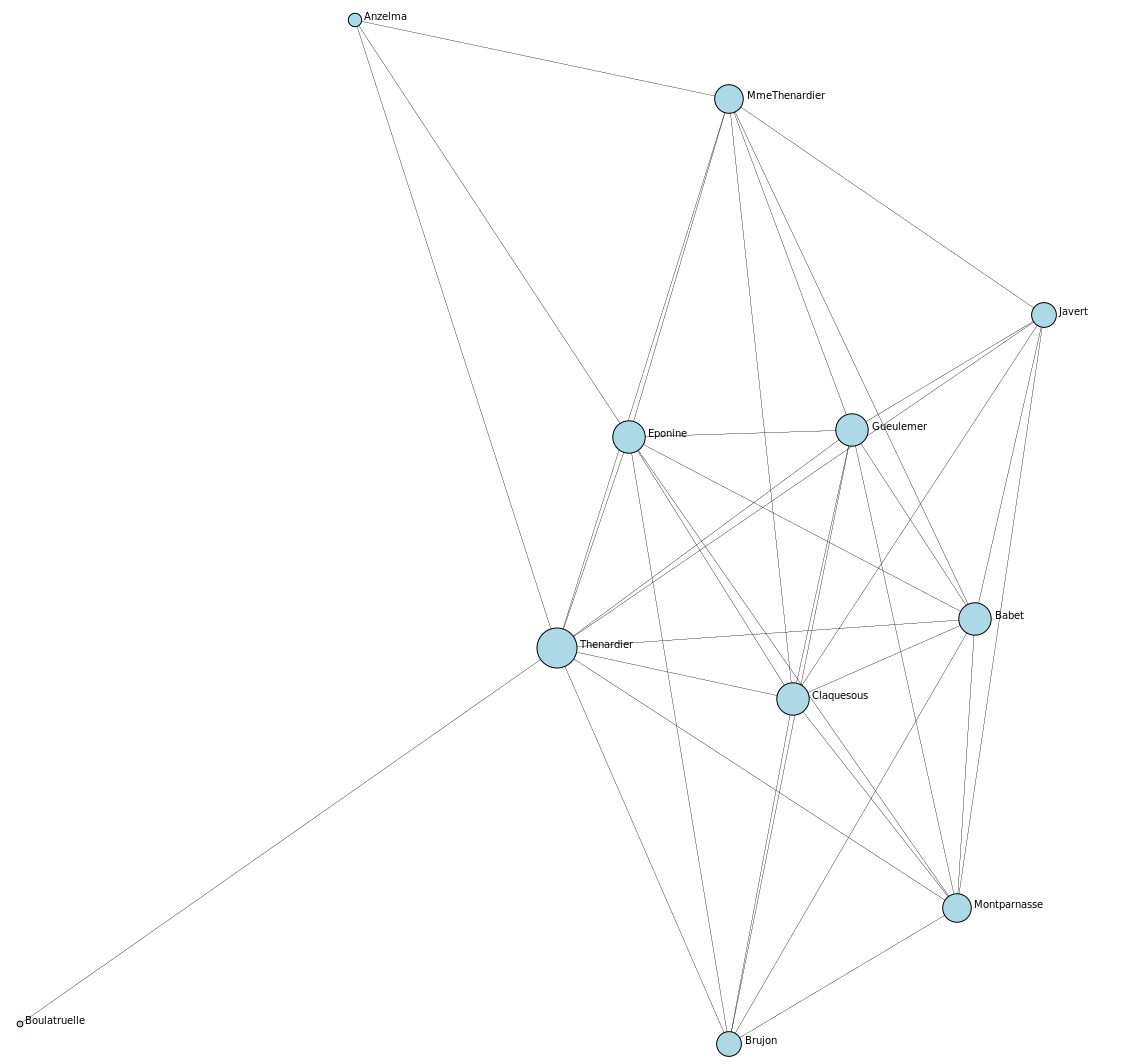

In [19]:
check_cluster = 5 

community_nodes = cluster_df[cluster_df['cluster']==check_cluster]['node'].to_list() 

G_comm = G_named.subgraph(community_nodes) 

draw_graph(G_comm, show_names=True, node_size=5) 

# graph embeddings in action

## FEATHER

In [20]:
def draw_clustering(embeddings, nodes, title): 

    import plotly.express as px 

    from sklearn.decomposition import PCA 

    embed_df = pd.DataFrame(embeddings) 

    # dim reduction, two features; solely for visualization 
    model = PCA(n_components=2) 

    X_features = model.fit_transform(embed_df) 

    embed_df = pd.DataFrame(X_features) 
    embed_df.index = nodes 
    embed_df.columns = ['x', 'y'] 

    fig = px.scatter(embed_df, x='x', y='y', text=embed_df.index) 

    fig.update_traces(textposition='top center') 
    fig.update_layout(height=800, title_text=title, font_size=11) 

    return fig.show()

In [21]:
from karateclub.node_embedding.attributed.feathernode import FeatherNode 

model = FeatherNode() 

model.fit(G, clf_df)  

embeddings = model.get_embedding() 

In [22]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [23]:
%pip install nbformat>=4.2.0

Note: you may need to restart the kernel to use updated packages.


In [24]:
title = 'Les Miserables Character Similarity (FeatherNode)' 

draw_clustering(embeddings, nodes, title) 

['Marius' 'Gavroche' 'Courfeyrac' 'Joly' 'Prouvaire' 'Bossuet'
 'Combeferre' 'Mabeuf' 'Grantaire' 'Enjolras' 'Bahorel' 'Feuilly']


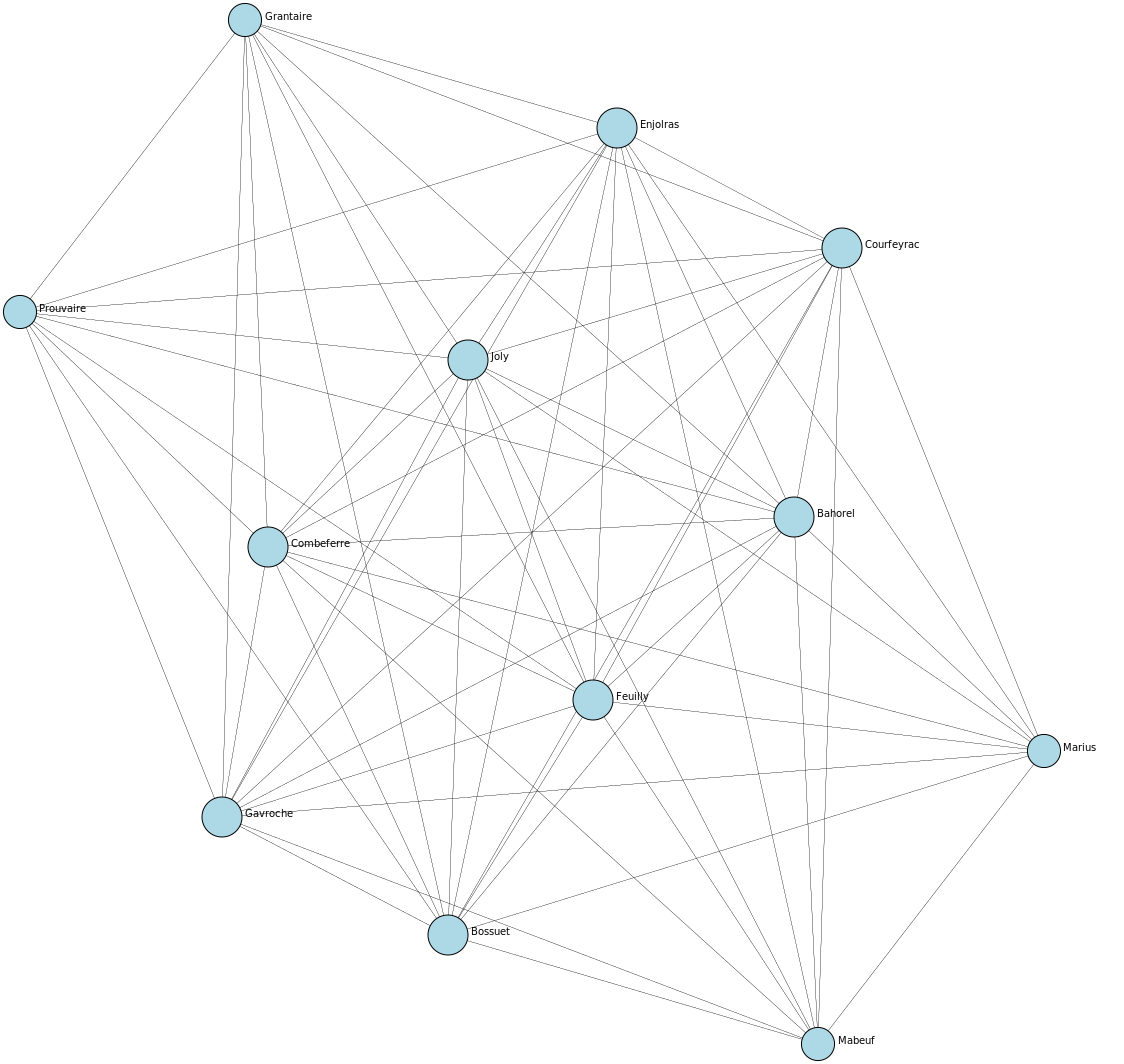

In [25]:
node = 'Feuilly' 

G_ego = nx.ego_graph(G_named, node) 

draw_graph(G_ego, show_names=True, node_size=3) 

['Gavroche' 'Courfeyrac' 'Joly' 'Prouvaire' 'Bossuet' 'Combeferre'
 'Grantaire' 'Enjolras' 'Bahorel' 'Feuilly']


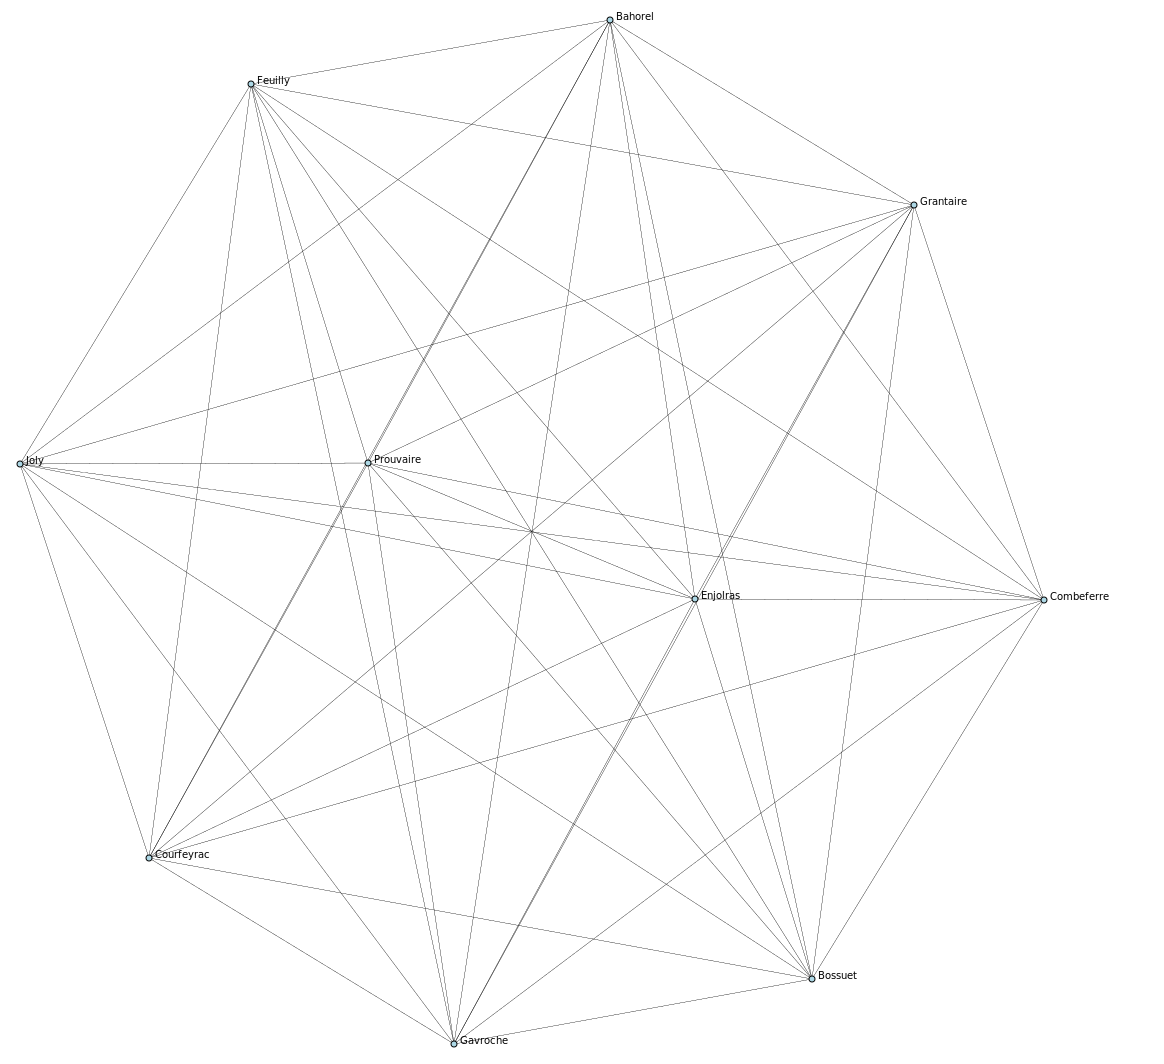

In [26]:
node = 'Prouvaire' 

G_ego = nx.ego_graph(G_named, node) 

draw_graph(G_ego, show_names=True, node_size=3) 

['Valjean' 'Fauchelevent' 'MotherInnocent']


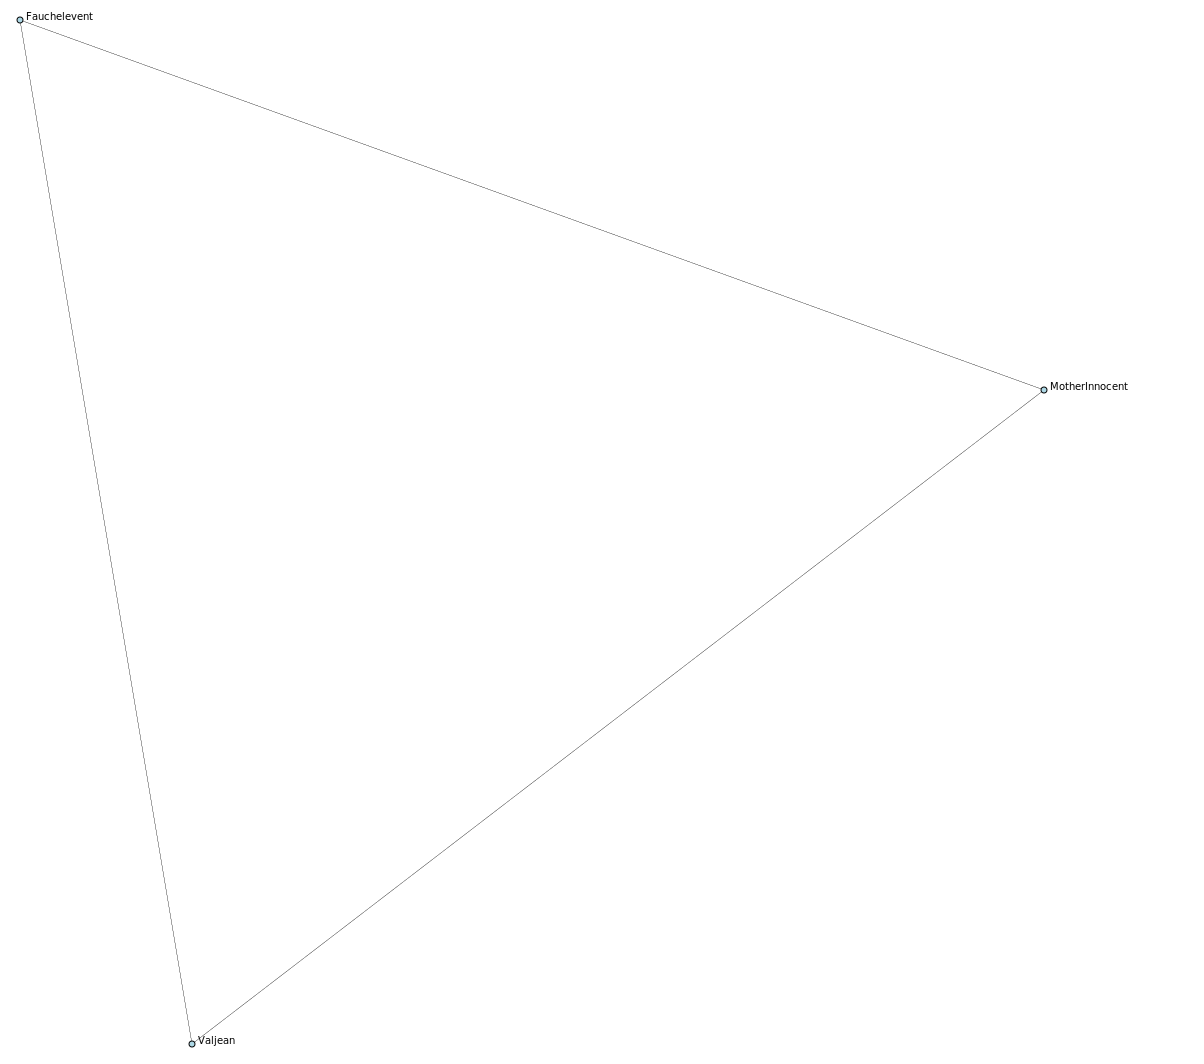

In [27]:
node = 'MotherInnocent' 

G_ego = nx.ego_graph(G_named, node) 

draw_graph(G_ego, show_names=True, node_size=3) 

['MlleBaptistine' 'MmeMagloire' 'Myriel' 'Valjean']


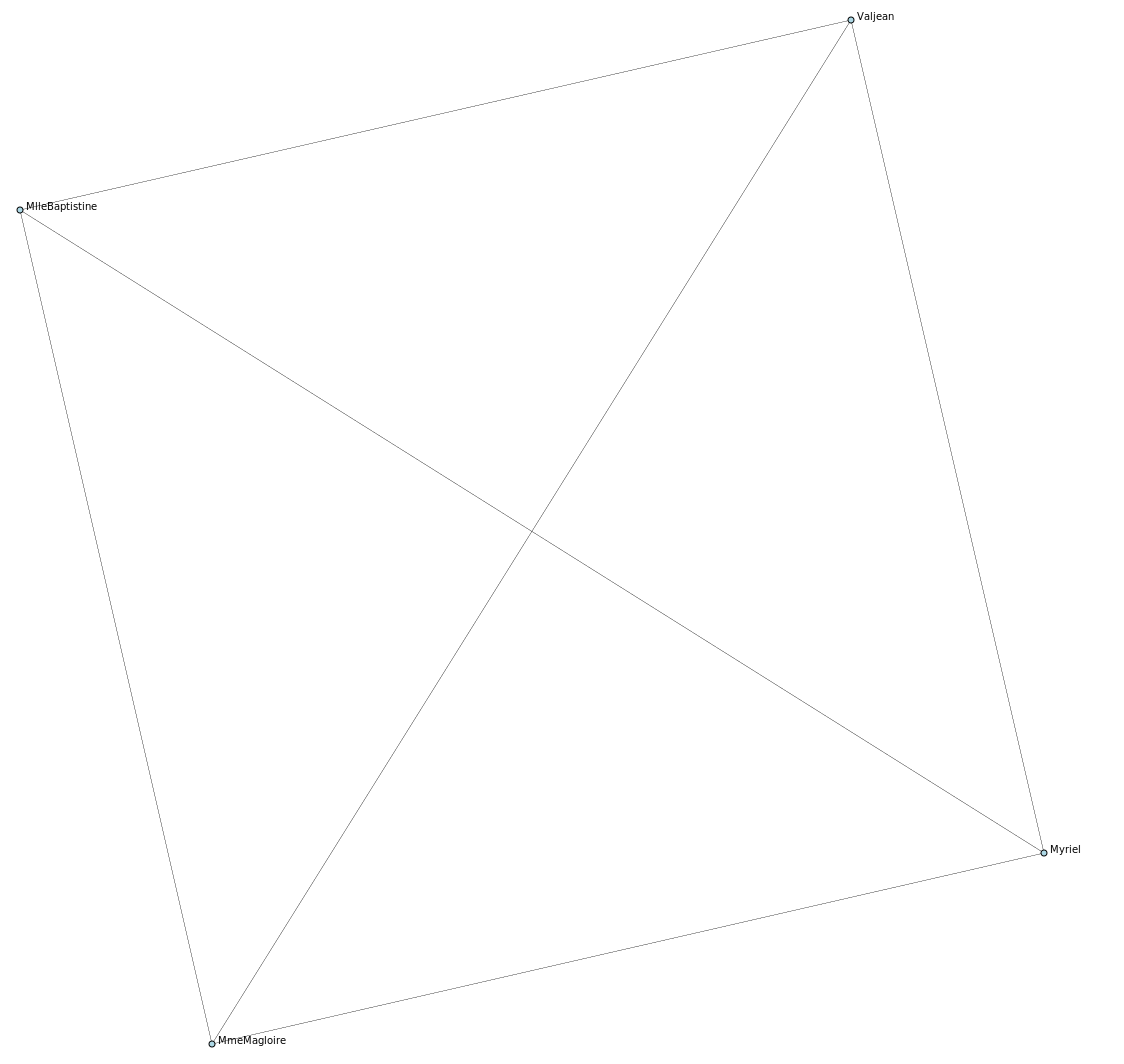

In [28]:
node = 'MmeMagloire' 

G_ego = nx.ego_graph(G_named, node) 

draw_graph(G_ego, show_names=True, node_size=3) 

In [29]:
eb_df = pd.DataFrame(embeddings, index=nodes) 

eb_df['label'] = clf_df['label'] 

eb_df.head(10) 

,0,1,2,3,4,5,6,7,8,9,...,1741,1742,1743,1744,1745,1746,1747,1748,1749,label
Napoleon,0.664985,0.471134,0.136111,-0.016215,0.154984,0.469122,0.601893,0.404308,0.049391,-0.137721,...,0.006781,0.006675,0.006496,0.006248,0.005933,0.005554,0.005116,0.004622,0.004078,0
Myriel,0.910804,0.723366,0.656674,0.610370,0.466355,0.628329,0.440952,0.388751,0.242645,0.030653,...,0.018148,0.017863,0.017386,0.016723,0.015879,0.014865,0.013691,0.012369,0.010915,0
MlleBaptistine,0.786000,0.345126,0.209002,0.136510,-0.156203,0.299175,-0.070888,-0.104387,-0.352101,-0.747891,...,0.036940,0.036360,0.035390,0.034039,0.032322,0.030257,0.027867,0.025177,0.022217,0
MmeMagloire,0.786000,0.345126,0.209002,0.136510,-0.156203,0.299175,-0.070888,-0.104387,-0.352101,-0.747891,...,0.036940,0.036360,0.035390,0.034039,0.032322,0.030257,0.027867,0.025177,0.022217,0
CountessDeLo,0.664985,0.471134,0.136111,-0.016215,0.154984,0.469122,0.601893,0.404308,0.049391,-0.137721,...,0.006781,0.006675,0.006496,0.006248,0.005933,0.005554,0.005116,0.004622,0.004078,0
Geborand,0.664985,0.471134,0.136111,-0.016215,0.154984,0.469122,0.601893,0.404308,0.049391,-0.137721,...,0.006781,0.006675,0.006496,0.006248,0.005933,0.005554,0.005116,0.004622,0.004078,0
Champtercier,0.664985,0.471134,0.136111,-0.016215,0.154984,0.469122,0.601893,0.404308,0.049391,-0.137721,...,0.006781,0.006675,0.006496,0.006248,0.005933,0.005554,0.005116,0.004622,0.004078,0
Cravatte,0.664985,0.471134,0.136111,-0.016215,0.154984,0.469122,0.601893,0.404308,0.049391,-0.137721,...,0.006781,0.006675,0.006496,0.006248,0.005933,0.005554,0.005116,0.004622,0.004078,0
Count,0.664985,0.471134,0.136111,-0.016215,0.154984,0.469122,0.601893,0.404308,0.049391,-0.137721,...,0.006781,0.006675,0.006496,0.006248,0.005933,0.005554,0.005116,0.004622,0.004078,0
OldMan,0.664985,0.471134,0.136111,-0.016215,0.154984,0.469122,0.601893,0.404308,0.049391,-0.137721,...,0.006781,0.006675,0.006496,0.006248,0.005933,0.005554,0.005116,0.004622,0.004078,0


In [30]:
from sklearn.model_selection import train_test_split 

X_cols = [c for c in eb_df.columns if c != 'label'] 

X = eb_df[X_cols] 

y = eb_df['label'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1337, test_size=0.3) 

In [31]:
from sklearn.ensemble import RandomForestClassifier 

clf = RandomForestClassifier(random_state=1337) 
clf.fit(X_train, y_train) 

train_acc = clf.score(X_train, y_train) 
test_acc = clf.score(X_test, y_test) 

print('train accuracy: {}\ntest accuracy: {}'.format(train_acc, test_acc)) 

train accuracy: 0.9811320754716981
test accuracy: 1.0


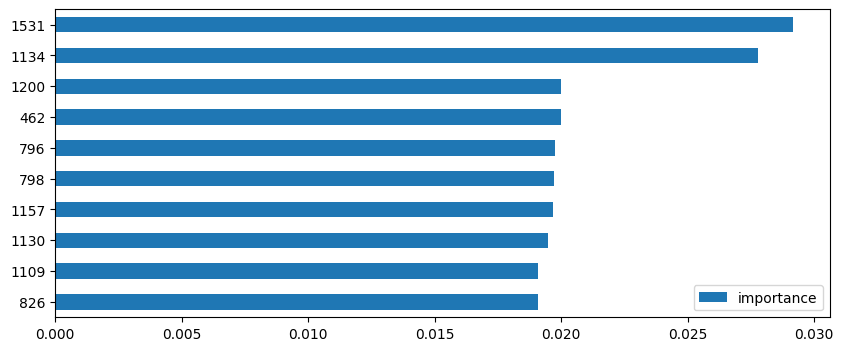

In [32]:
importances = pd.DataFrame(clf.feature_importances_, index=X_train.columns) 

importances.columns = ['importance'] 

importances.sort_values('importance', ascending=False, inplace=True) 

importances[0:10].plot.barh(figsize=(10,4)).invert_yaxis() 

## NodeSketch

In [33]:
from karateclub.node_embedding.neighbourhood.nodesketch import NodeSketch 

model = NodeSketch() 
model.fit(G) 

embeddings = model.get_embedding() 

title = 'Les Miserables Character Similarity (NodeSketch)' 

draw_clustering(embeddings, nodes, title) 

['Marius' 'Montparnasse' 'Claquesous' 'Brujon' 'Eponine' 'Gueulemer'
 'Babet' 'Thenardier' 'Mabeuf' 'MmeThenardier' 'Courfeyrac' 'Anzelma']


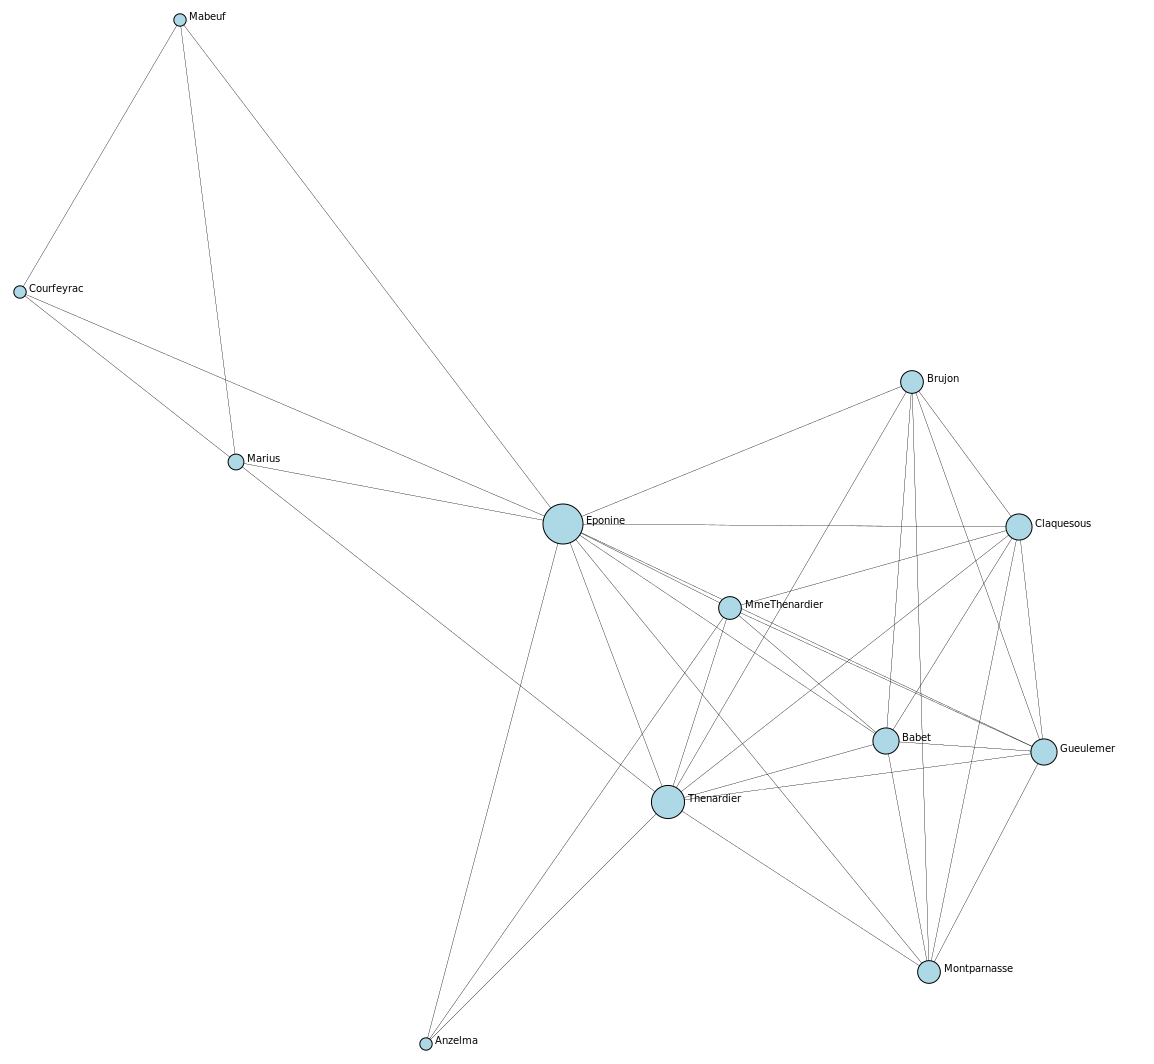

In [34]:
node = 'Eponine' 

G_ego = nx.ego_graph(G_named, node) 

draw_graph(G_ego, show_names=True, node_size=3) 

['Montparnasse' 'Claquesous' 'Gavroche' 'Brujon' 'Eponine' 'Thenardier'
 'Babet' 'Gueulemer']


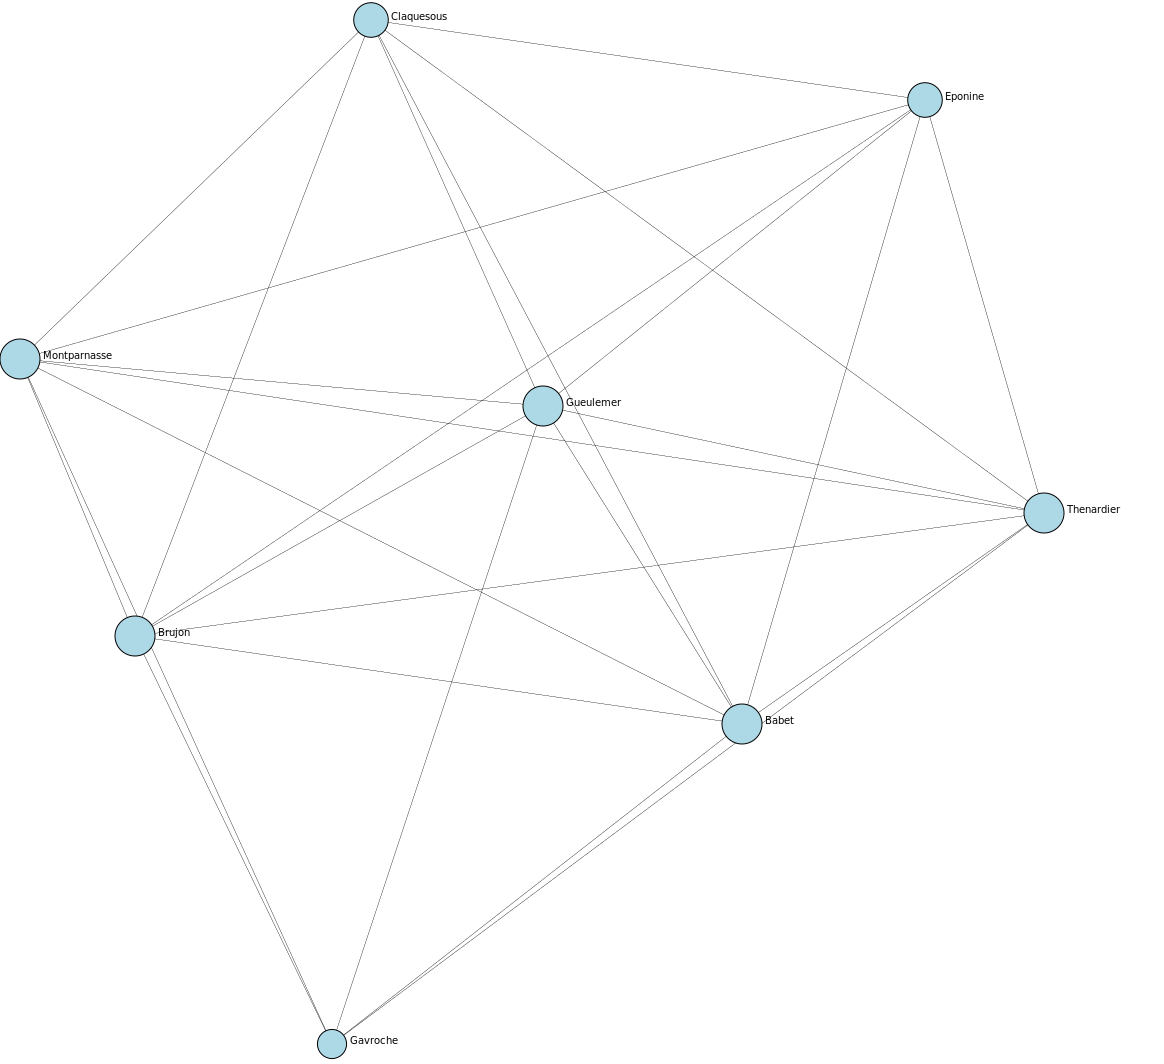

In [35]:
node = 'Brujon' 

G_ego = nx.ego_graph(G_named, node) 

draw_graph(G_ego, show_names=True, node_size=3) 

In [36]:
eb_df = pd.DataFrame(embeddings, index=nodes) 
eb_df['label'] = clf_df['label'] 
eb_df.head(10) 

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,label
Napoleon,1,1,0,1,0,0,0,1,1,0,...,1,0,1,0,0,1,0,1,1,0
Myriel,1,3,0,10,5,5,9,1,2,2,...,2,6,10,10,4,9,10,4,7,0
MlleBaptistine,1,3,3,10,2,10,2,1,2,2,...,2,10,10,10,3,3,10,10,1,0
MmeMagloire,1,3,3,10,2,10,2,1,2,2,...,2,10,10,10,3,3,10,10,1,0
CountessDeLo,1,4,1,4,1,4,1,1,1,4,...,1,4,1,4,4,4,1,4,1,0
Geborand,1,1,5,1,5,5,5,1,1,5,...,1,5,1,5,5,5,1,1,1,0
Champtercier,1,1,6,1,6,6,1,1,6,6,...,1,6,1,1,6,6,1,1,1,0
Cravatte,1,1,7,7,7,7,7,1,7,7,...,1,1,1,7,7,7,7,1,7,0
Count,1,1,8,1,8,8,1,1,8,1,...,1,8,8,1,8,8,1,1,1,0
OldMan,1,9,9,9,1,9,9,1,9,9,...,1,1,9,1,9,9,1,1,1,0


In [37]:
X_cols = [c for c in eb_df.columns if c != 'label'] 

X = eb_df[X_cols] 
y = eb_df['label'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1337, test_size=0.3) 

clf = RandomForestClassifier(random_state=1337) 
clf.fit(X_train, y_train) 

train_acc = clf.score(X_train, y_train) 
test_acc = clf.score(X_test, y_test) 

print('train accuracy: {}\ntest accuracy: {}'.format(train_acc, test_acc)) 

train accuracy: 0.9811320754716981
test accuracy: 1.0


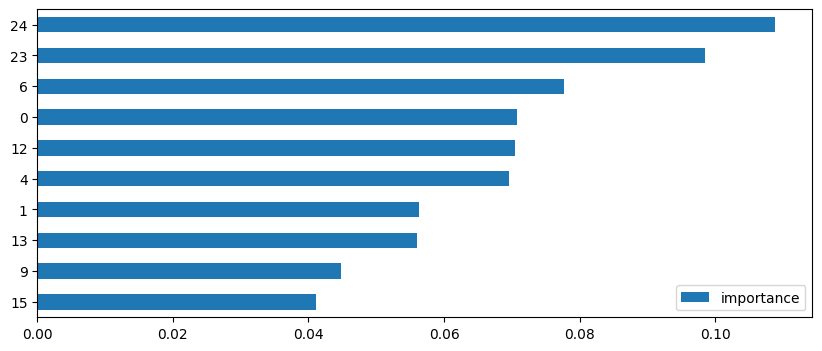

In [38]:
importances = pd.DataFrame(clf.feature_importances_, index=X_train.columns) 
importances.columns = ['importance'] 
importances.sort_values('importance', ascending=False, inplace=True) 
importances[0:10].plot.barh(figsize=(10,4)).invert_yaxis() 

## RandNE

In [39]:
from karateclub.node_embedding.neighbourhood.randne import RandNE 

model = RandNE()  

model.fit(G) 

embeddings = model.get_embedding() 

title = 'Les Miserables Character Similarity (RandNE)' 

draw_clustering(embeddings, nodes, title) 

['Joly' 'Bossuet' 'Combeferre' 'Bahorel' 'Gillenormand' 'Pontmercy'
 'MlleGillenormand' 'Valjean' 'Mabeuf' 'BaronessT' 'Enjolras' 'Courfeyrac'
 'Marius' 'Gavroche' 'Eponine' 'LtGillenormand' 'Feuilly' 'Cosette'
 'Thenardier' 'Tholomyes']


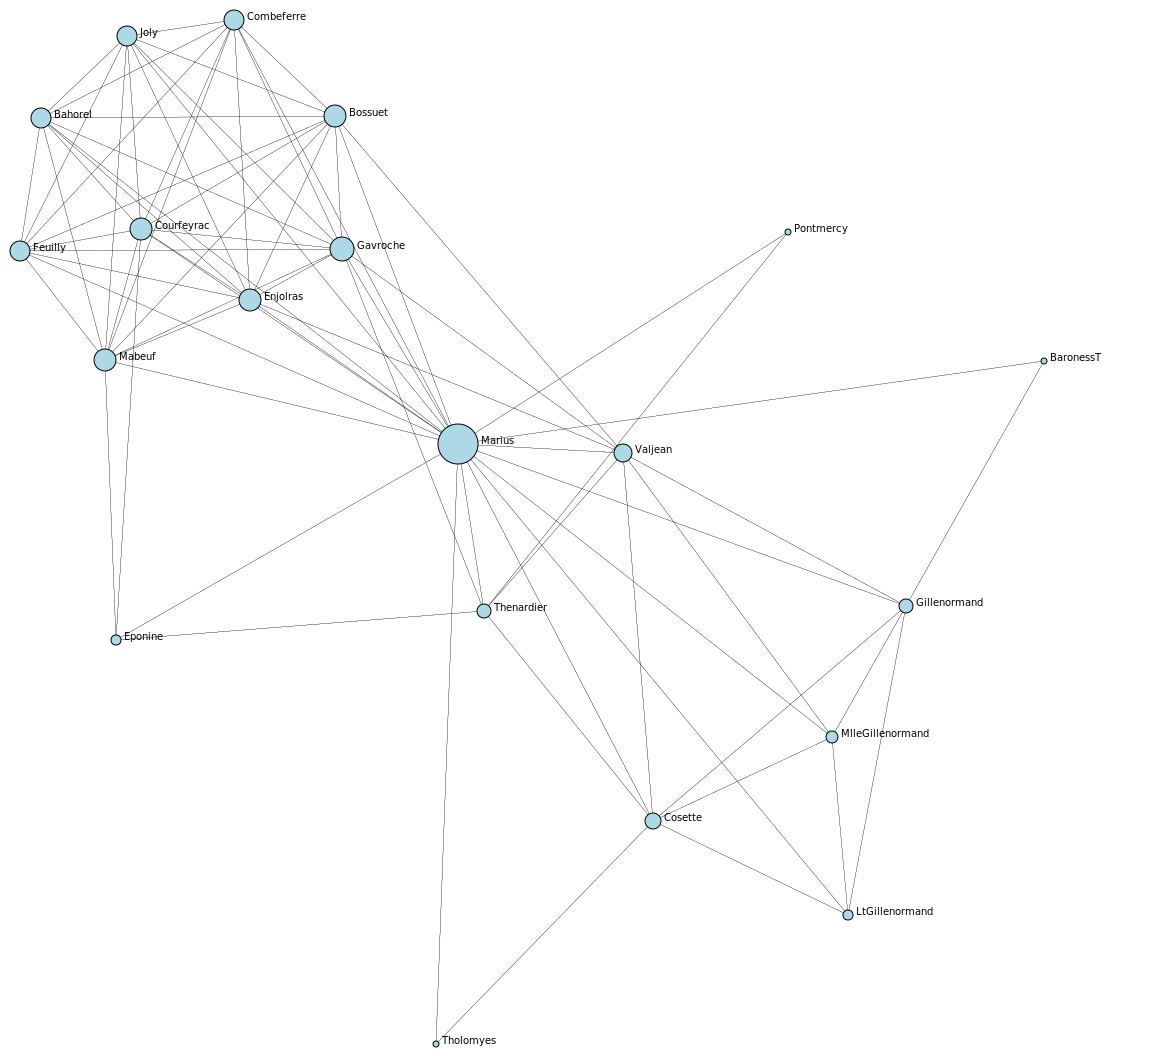

In [40]:
node = 'Marius' 

G_ego = nx.ego_graph(G_named, node) 

draw_graph(G_ego, show_names=True, node_size=3) 

['MotherPlutarch' 'Mabeuf']


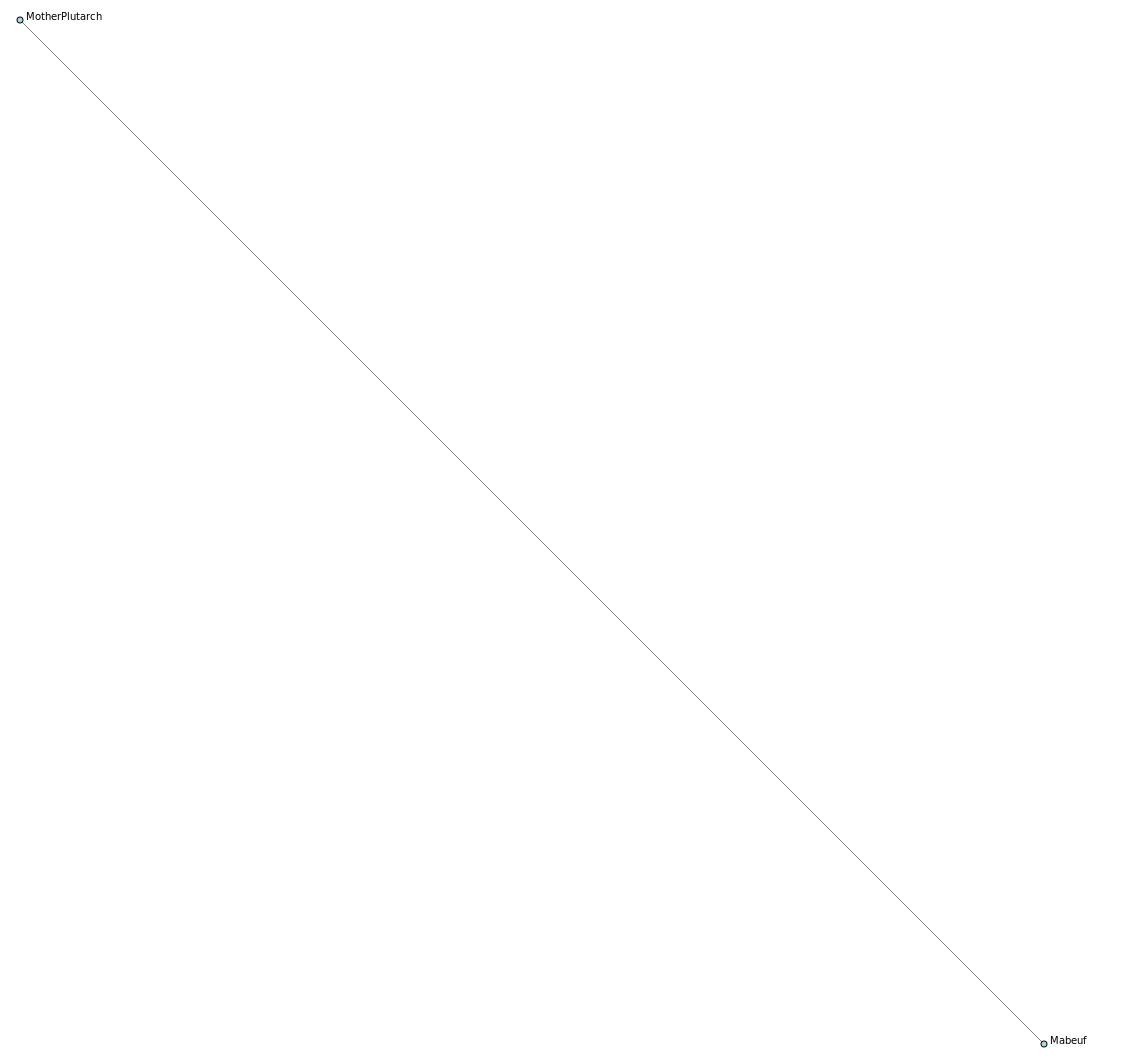

In [41]:
node = 'MotherPlutarch' 

G_ego = nx.ego_graph(G_named, node) 

draw_graph(G_ego, show_names=True, node_size=3) 

In [42]:
eb_df = pd.DataFrame(embeddings, index=nodes) 
eb_df['label'] = clf_df['label'] 
eb_df.head(10) 

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,label
Napoleon,-0.948999,-0.370539,1.019771,-1.546844,1.402960,1.120856,-0.568228,-1.519486,0.948075,-1.082952,...,1.906159,2.644384,0.218053,0.159104,0.934097,2.359730,-0.653231,0.227149,-0.503227,0
Myriel,-0.610640,0.090700,0.049499,-1.010176,0.796567,0.448242,1.176782,0.142189,1.695997,-0.956446,...,0.238334,1.600401,-0.011550,0.767777,0.245079,1.778985,-0.529803,-0.115408,-0.865915,0
MlleBaptistine,-0.817743,-0.554192,0.195265,-1.858893,1.151244,-0.231442,2.786735,0.482611,1.710762,0.601138,...,1.414692,0.623162,0.254414,0.264657,0.612472,1.445655,-0.067747,-0.669005,-0.936394,0
MmeMagloire,-0.817743,-0.554192,0.195265,-1.858893,1.151244,-0.231442,2.786735,0.482611,1.710762,0.601138,...,1.414692,0.623162,0.254414,0.264657,0.612472,1.445655,-0.067747,-0.669005,-0.936394,0
CountessDeLo,-0.216952,-1.242731,2.450365,-0.852710,0.944617,0.507591,0.425176,-1.436033,2.486548,-1.007876,...,0.114750,1.392726,0.630268,3.428321,1.422459,1.222064,-1.347355,0.853628,-1.532143,0
Geborand,-0.120592,1.374095,1.992590,0.611790,1.330882,1.169039,2.547460,-1.041690,1.818367,-1.134910,...,1.609993,1.391578,0.850674,1.195215,-0.526138,2.330457,-0.183465,0.484761,-1.140059,0
Champtercier,0.169160,1.485793,0.963990,-0.051599,0.582123,2.055235,0.132082,0.604906,1.326603,-0.193353,...,-0.849449,0.915424,-0.090989,-0.925257,1.535475,2.548945,-0.799657,-0.218955,-1.463225,0
Cravatte,-0.288429,-0.158740,0.461061,0.226257,0.898541,0.576785,0.636480,-2.532547,0.761615,-0.566386,...,-0.349996,3.087163,-1.298550,1.710087,-1.423577,1.931920,0.971493,0.446216,-2.530790,0
Count,-2.173779,0.361887,1.540971,-0.698783,0.742119,0.261203,0.860602,1.204151,0.853675,-1.458796,...,0.860835,1.060284,-1.009853,0.839885,0.071028,1.706517,-0.047615,2.233535,-2.580347,0
OldMan,0.181095,-1.714148,0.102184,-0.943174,1.800889,3.403846,0.165649,0.168705,2.112665,-2.533567,...,0.400448,0.939491,-1.681064,1.099397,-0.197978,-0.175982,-1.541636,1.744847,-1.734477,0


In [43]:
X_cols = [c for c in eb_df.columns if c != 'label'] 

X = eb_df[X_cols] 
y = eb_df['label'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1337, test_size=0.3) 

clf = RandomForestClassifier(random_state=1337) 
clf.fit(X_train, y_train) 

train_acc = clf.score(X_train, y_train) 
test_acc = clf.score(X_test, y_test) 

print('train accuracy: {}\ntest accuracy: {}'.format(train_acc, test_acc)) 

train accuracy: 0.9811320754716981
test accuracy: 0.9166666666666666


## GraRep

In [44]:
from karateclub.node_embedding.neighbourhood.grarep import GraRep 

model = GraRep() 

model.fit(G) 

embeddings = model.get_embedding() 

In [45]:
eb_df = pd.DataFrame(embeddings, index=nodes) 
eb_df['label'] = clf_df['label'] 
eb_df.head(10) 

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,label
Napoleon,5.316003,-3.257897,-0.414313,1.171641,23.673025,2.923977,-0.002217,-0.387702,-0.766810,0.681690,...,-0.032577,0.004475,-0.005909,-0.000112,0.005546,-0.021997,-0.036247,0.117460,0.004010,0
Myriel,57.396095,-21.274029,-7.043912,-10.142180,13.683681,0.938422,1.390509,-0.456746,-0.610024,-1.751686,...,0.101423,0.006521,0.008563,-0.012048,-0.015738,-0.000004,-0.000011,0.000026,-0.000001,0
MlleBaptistine,52.836117,-19.825819,-6.545948,-9.071099,15.858015,1.348985,1.242817,-0.419276,-0.499468,-1.808167,...,0.133588,-0.021598,0.030302,0.010605,-0.016456,-0.000004,-0.000011,0.000026,0.000005,0
MmeMagloire,52.836117,-19.825819,-6.545948,-9.071099,15.858015,1.348985,1.242817,-0.419276,-0.499468,-1.808167,...,0.133588,-0.021598,0.030302,0.010605,-0.016456,-0.000004,-0.000011,0.000026,0.000005,0
CountessDeLo,5.316003,-3.257897,-0.414313,1.171641,23.673025,2.923977,-0.002217,-0.387702,-0.766810,0.681690,...,-0.032577,0.004473,-0.005909,-0.000111,0.005544,-0.015041,0.029235,-0.040203,0.087162,0
Geborand,5.316003,-3.257897,-0.414313,1.171641,23.673025,2.923977,-0.002217,-0.387702,-0.766810,0.681690,...,-0.032578,0.004476,-0.005907,-0.000117,0.005542,-0.059969,0.056563,0.003699,0.008070,0
Champtercier,5.316003,-3.257897,-0.414313,1.171641,23.673025,2.923977,-0.002217,-0.387702,-0.766810,0.681690,...,-0.032578,0.004477,-0.005905,-0.000118,0.005542,0.016766,-0.036481,-0.017145,0.042617,0
Cravatte,5.316003,-3.257896,-0.414313,1.171641,23.673025,2.923977,-0.002217,-0.387702,-0.766810,0.681690,...,-0.032577,0.004474,-0.005909,-0.000111,0.005544,0.107698,-0.018705,-0.004800,-0.002677,0
Count,5.316003,-3.257896,-0.414313,1.171641,23.673025,2.923977,-0.002217,-0.387702,-0.766810,0.681690,...,-0.032577,0.004475,-0.005908,-0.000112,0.005548,0.022988,0.080873,0.000505,-0.075782,0
OldMan,5.316003,-3.257896,-0.414313,1.171641,23.673025,2.923977,-0.002217,-0.387702,-0.766810,0.681690,...,-0.032577,0.004475,-0.005908,-0.000111,0.005550,-0.050472,-0.075320,-0.059314,-0.063383,0


In [46]:
X_cols = [c for c in eb_df.columns if c != 'label'] 

X = eb_df[X_cols] 
y = eb_df['label'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1337, test_size=0.3) 

clf = RandomForestClassifier(random_state=1337) 
clf.fit(X_train, y_train) 

train_acc = clf.score(X_train, y_train) 
test_acc = clf.score(X_test, y_test) 

print('train accuracy: {}\ntest accuracy: {}'.format(train_acc, test_acc)) 

train accuracy: 0.9811320754716981
test accuracy: 0.9583333333333334
